Instanciando la red pre-entrenada VGG16 para la misma BD de perros y gatos reducida (5000 imágenes)pero con expansión de datos 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


Accediendo a la BD de perros y gatos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
original_dir=r"/content/drive/MyDrive/PetImages"
new_base_dir=r"/content/drive/MyDrive/PetImages/cats_vs_dogs_small"

Mounted at /content/drive


Ajustando los datos de la BD de perros y gatos

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Muestra la lista de pesos antes y despues del hacer estática VGG

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Expansión de las imágenes, definición de la arquitectura y establecimiento de los hiperparámetros de entrenamiento 

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Entrenando ...

In [ ]:
history = model.fit(
    train_dataset,
    epochs=10, #100
    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 935s 14s/step - loss: 25.6799 - accuracy: 0.8940 - val_loss: 12.9527 - val_accuracy: 0.9310
Epoch 2/10
63/63 [==============================] - 861s 14s/step - loss: 8.0633 - accuracy: 0.9445 - val_loss: 6.0463 - val_accuracy: 0.9670
Epoch 3/10
63/63 [==============================] - 863s 14s/step - loss: 6.7127 - accuracy: 0.9575 - val_loss: 6.0772 - val_accuracy: 0.9630
Epoch 4/10
63/63 [==============================] - 864s 14s/step - loss: 6.5152 - accuracy: 0.9545 - val_loss: 5.9133 - val_accuracy: 0.9700
Epoch 5/10
63/63 [==============================] - 865s 14s/step - loss: 3.8305 - accuracy: 0.9660 - val_loss: 3.7750 - val_accuracy: 0.9760
Epoch 6/10
63/63 [==============================] - 861s 14s/step - loss: 2.7774 - accuracy: 0.9765 - val_loss: 3.5580 - val_accuracy: 0.9790
Epoch 7/10
63/63 [==============================] - 864s 14s/step - loss: 4.8788 - accuracy: 0.9680 - val_loss: 5.8290 - val_accuracy: 0.9730
Epoc

Evaluación del modelo con la pérdida y el accuracy durante el entrenamiento

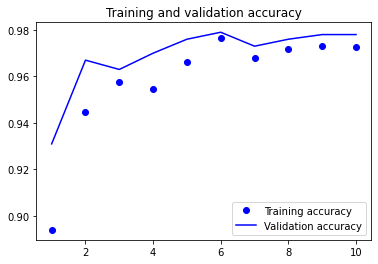

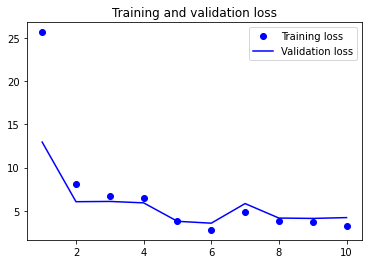

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()